# Bank Transaction Fraud Detection 

### This is the data set used: [Dataset](https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection)

### Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Import Data 

In [2]:
data = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

### EDA

In [3]:
data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
data.tail()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com
199999,f3dd92ef-b17a-45d2-b6cb-fdbee20843fe,Gopal Rout,Male,34,Nagaland,Kohima,Kohima Branch,Business,b44b6e8a-1036-4ec1-b492-5e7ffc7baf6d,08-01-2025,...,Electronics,15066.24,Virtual Card,"Kohima, Nagaland",Mobile,0,INR,+9193961XXXXXX,Installment payment,gopalXXXXX@XXXXXXX.com


In [5]:
data.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [7]:
data.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [8]:
data.duplicated().sum()

0

### Unique Data 

In [9]:
keys = []
dict_uni = {}
for i in range(len(data.columns)):
    k = keys.append(data.columns[i])
    u = len(data.iloc[:,i].unique())
    d = dict_uni.update([(keys[i],u)])

In [10]:
dict_uni

{'Customer_ID': 200000,
 'Customer_Name': 142699,
 'Gender': 2,
 'Age': 53,
 'State': 34,
 'City': 145,
 'Bank_Branch': 145,
 'Account_Type': 3,
 'Transaction_ID': 200000,
 'Transaction_Date': 31,
 'Transaction_Time': 77856,
 'Transaction_Amount': 197978,
 'Merchant_ID': 200000,
 'Transaction_Type': 5,
 'Merchant_Category': 6,
 'Account_Balance': 197954,
 'Transaction_Device': 20,
 'Transaction_Location': 148,
 'Device_Type': 4,
 'Is_Fraud': 2,
 'Transaction_Currency': 1,
 'Customer_Contact': 9000,
 'Transaction_Description': 172,
 'Customer_Email': 4779}

In this section, the information corresponding to the customer name, ID and date type data will be eliminated. Additionally, the non-numeric variables will be coded.

In [11]:
delete_X = ["Customer_ID","Customer_Name","Transaction_ID",
            "Transaction_Date","Transaction_Time","Merchant_ID", 
            "Customer_Contact", "Customer_Email","Transaction_Currency"]

In [12]:
data_processed = data.drop(delete_X,
                   axis = 1)
data_processed.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment


In [13]:
categorical = [i for i in data_processed.columns if data_processed[i].dtype == 'O'] 
numerical = [i for i in data_processed.columns if data_processed[i].dtype != 'O'] 

In [14]:
categorical

['Gender',
 'State',
 'City',
 'Bank_Branch',
 'Account_Type',
 'Transaction_Type',
 'Merchant_Category',
 'Transaction_Device',
 'Transaction_Location',
 'Device_Type',
 'Transaction_Description']

In [15]:
numerical

['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

### Data visualization

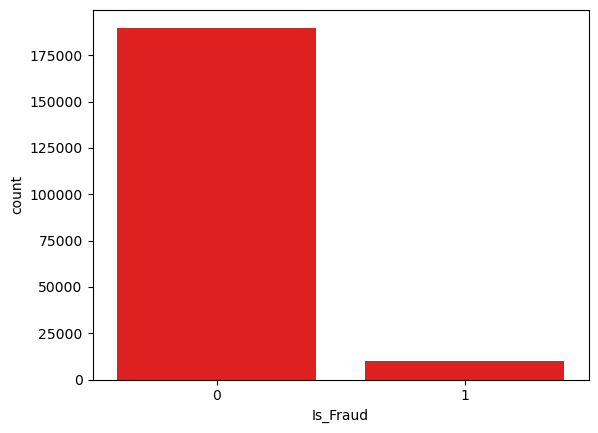

In [16]:
sns.countplot(x = data_processed['Is_Fraud'],color = 'r');

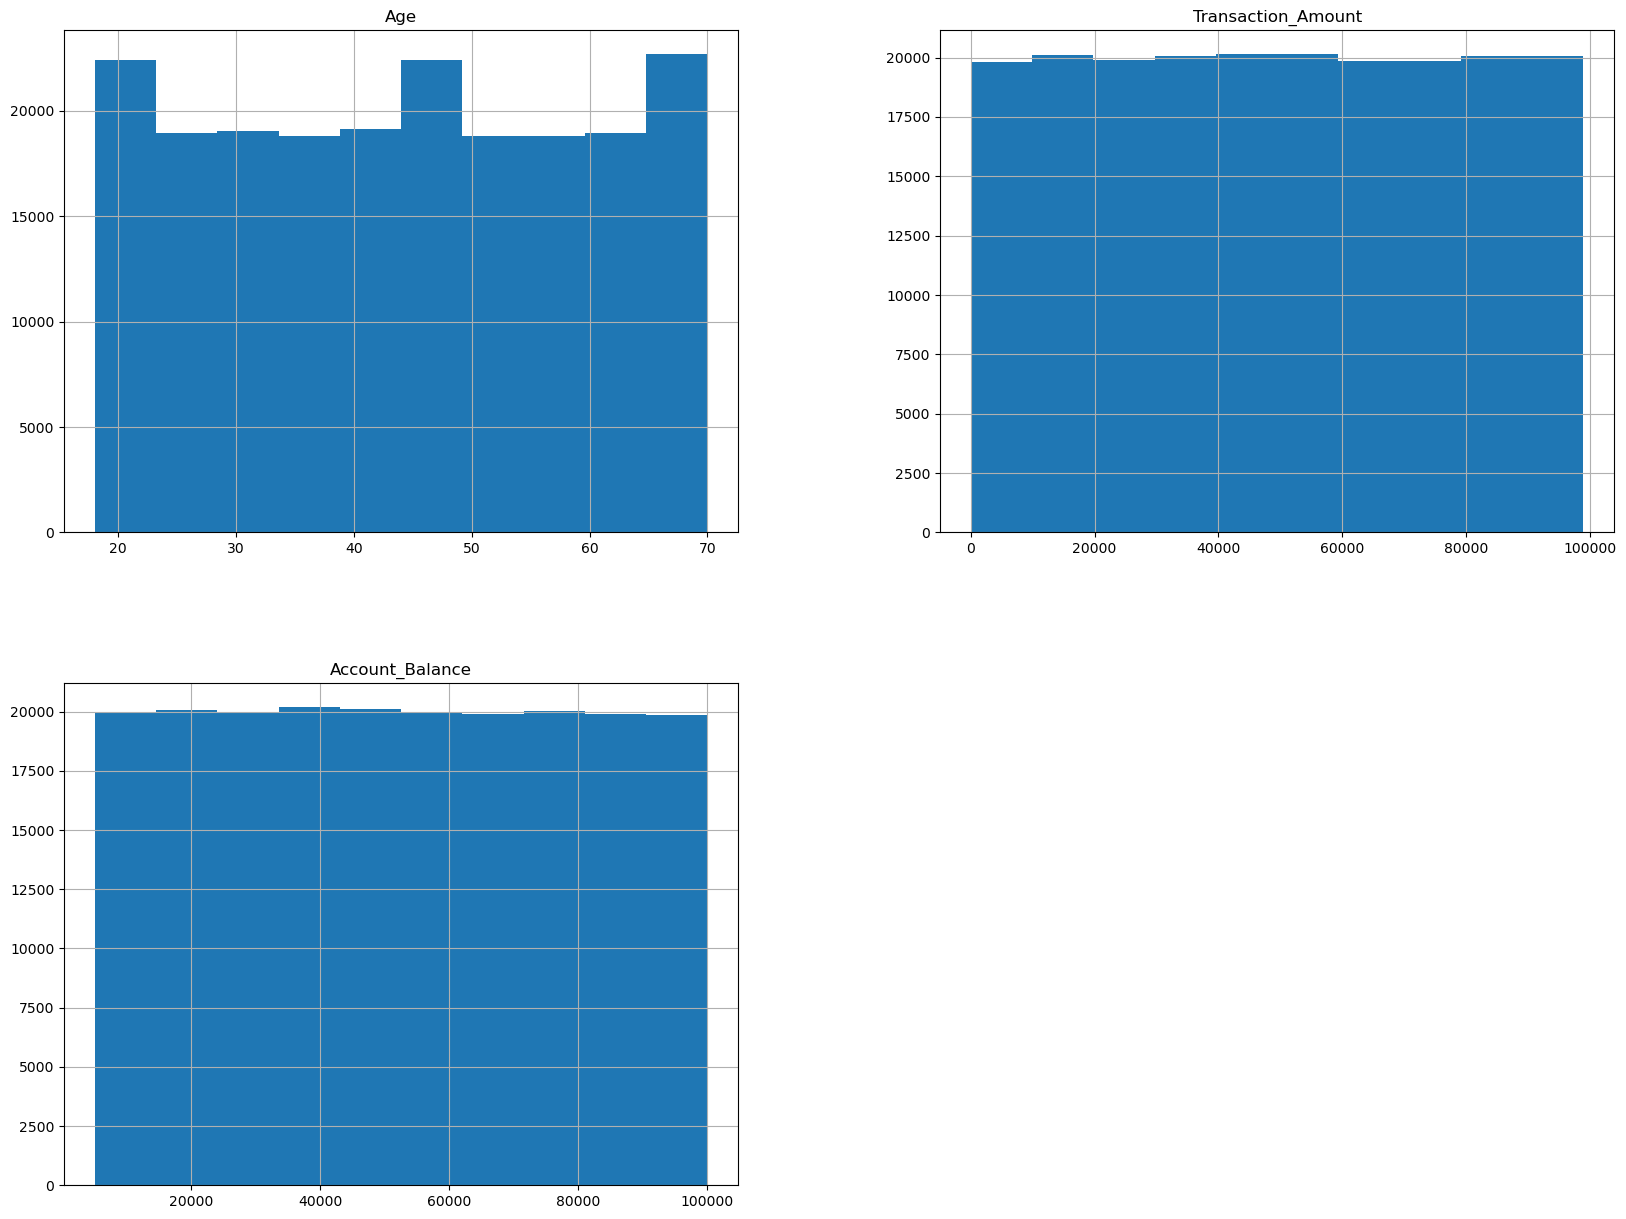

In [17]:
data_processed.hist(["Age","Transaction_Amount","Account_Balance"],figsize=(20,15));

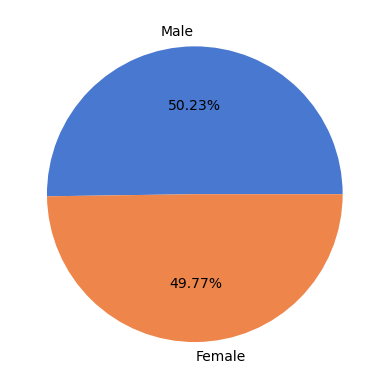

In [18]:
gender_data = data_processed.Gender.value_counts()
colors = sns.color_palette("muted")
plt.pie(gender_data,labels=gender_data.index,autopct='%1.2f%%',colors=colors);

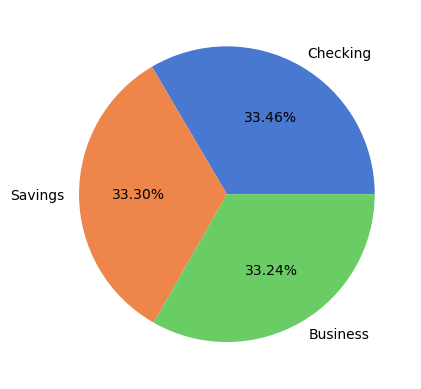

In [19]:
accountt_data = data_processed.Account_Type.value_counts()
plt.pie(accountt_data,labels=accountt_data.index,autopct='%1.2f%%',colors=colors);

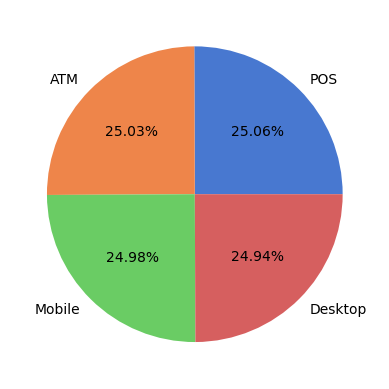

In [20]:
devicet_data = data_processed.Device_Type.value_counts()
plt.pie(devicet_data,labels=devicet_data.index,autopct='%1.2f%%',colors=colors);

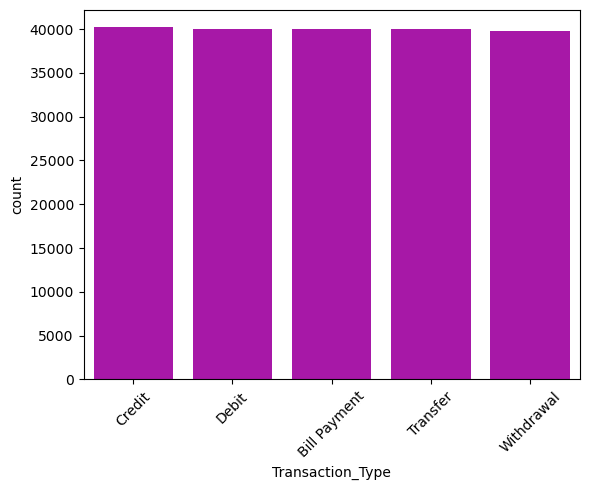

In [21]:
transactiont_data = data_processed.Transaction_Type.value_counts()
sns.barplot(x=transactiont_data.index, y=transactiont_data,color='m')
plt.xticks(rotation=45, fontsize=10);

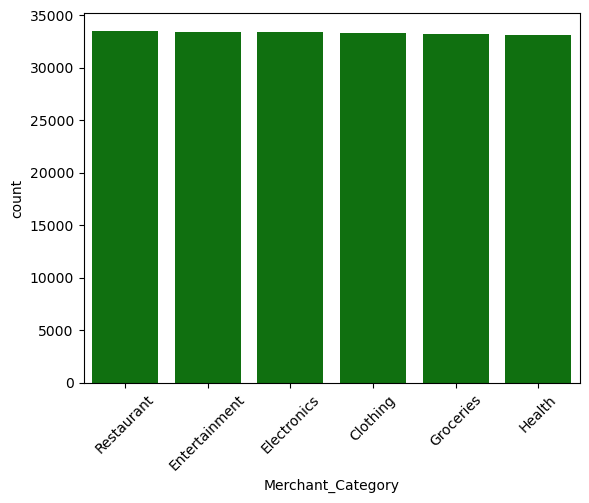

In [22]:
merchantc_data = data_processed.Merchant_Category.value_counts()
sns.barplot(x=merchantc_data.index, y=merchantc_data, color='g')
plt.xticks(rotation=45, fontsize=10);

In [23]:
X_data = data_processed.drop("Is_Fraud",axis=1)

In [24]:
y_data = data.Is_Fraud

In [25]:
random_state = 42
rus = RandomUnderSampler(sampling_strategy=0.1 ,random_state=random_state)
X_resampled, y_resampled = rus.fit_resample(X_data, y_data)

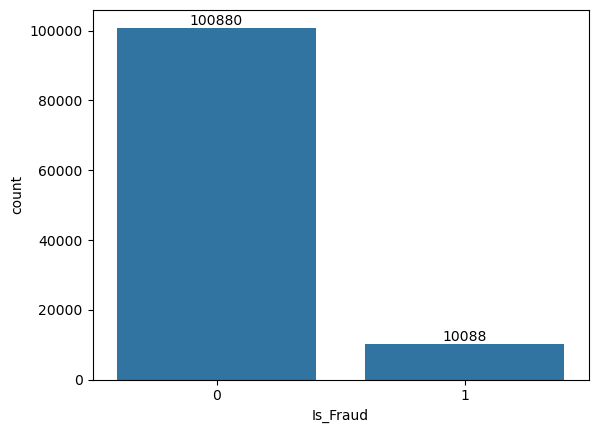

In [26]:
ax = sns.countplot(x=y_resampled)
ax.bar_label(ax.containers[0]);

In [27]:
le = LabelEncoder()

In [28]:
X_data_cod = X_resampled
list_c = X_resampled.columns
for i in list_c: 
    X_data_cod[i] = le.fit_transform(X_resampled[i])

In [29]:
scaler = StandardScaler()

In [30]:
X_data_std = scaler.fit_transform(X_data_cod)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data_std,y_resampled.values,test_size=0.3,random_state=random_state)

### Naive Bayes

In [32]:
nv = GaussianNB()
nv.fit(X_train,y_train)
y_pred = nv.predict(X_test)

In [33]:
nv_cm = confusion_matrix(y_test,y_pred)

In [34]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred):.2f}")

Accuracy is: 0.91


### Decision Tree

In [35]:
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)

In [36]:
dt_cm = confusion_matrix(y_test,y_pred2)

In [37]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred2):.2f}")

Accuracy is: 0.82


### Random Forest

In [38]:
rf= RandomForestClassifier(random_state=random_state)
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)

In [39]:
rf_cm = confusion_matrix(y_test,y_pred3)

In [40]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred3):.2f}")

Accuracy is: 0.91


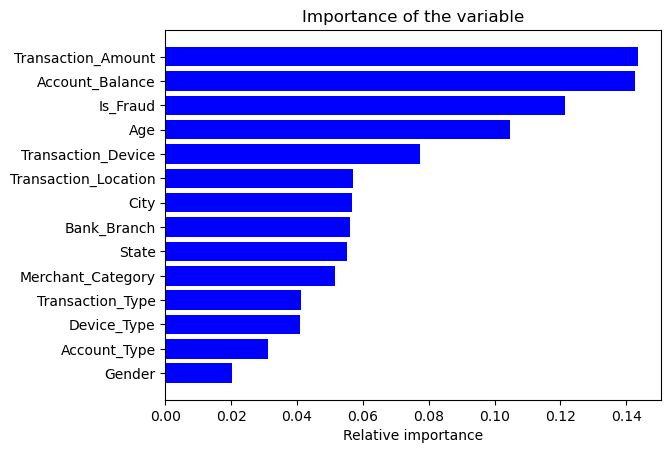

In [41]:
df_columns = data_processed.columns 
importances = rf.feature_importances_
index = np.argsort(importances)
plt.title("Importance of the variable")
plt.barh(range(len(index)), importances[index], color="b", align="center")
plt.yticks(range(len(index)), [df_columns[i] for i in index])
plt.xlabel("Relative importance");

### k-Nearest Neighbors (kNN)

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred4 = knn.predict(X_test)

In [43]:
knn_cm = confusion_matrix(y_test,y_pred4)

In [44]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred4):.2f}")

Accuracy is: 0.90


### Logistic Regression

In [45]:
lr= LogisticRegression(random_state=random_state)
lr.fit(X_train,y_train)
y_pred5 = lr.predict(X_test)

In [46]:
lr_cm = confusion_matrix(y_test,y_pred5)

In [47]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred5):.2f}")

Accuracy is: 0.91


### Multi-layer perceptron (MLP)

In [48]:
mlp = MLPClassifier(random_state=random_state,verbose=False)
mlp.fit(X_train,y_train)
y_pred6=mlp.predict(X_test)

In [49]:
mlp_cm = confusion_matrix(y_test,y_pred6)

In [50]:
print(f"Accuracy is: {accuracy_score(y_test,y_pred6):.2f}")

Accuracy is: 0.91


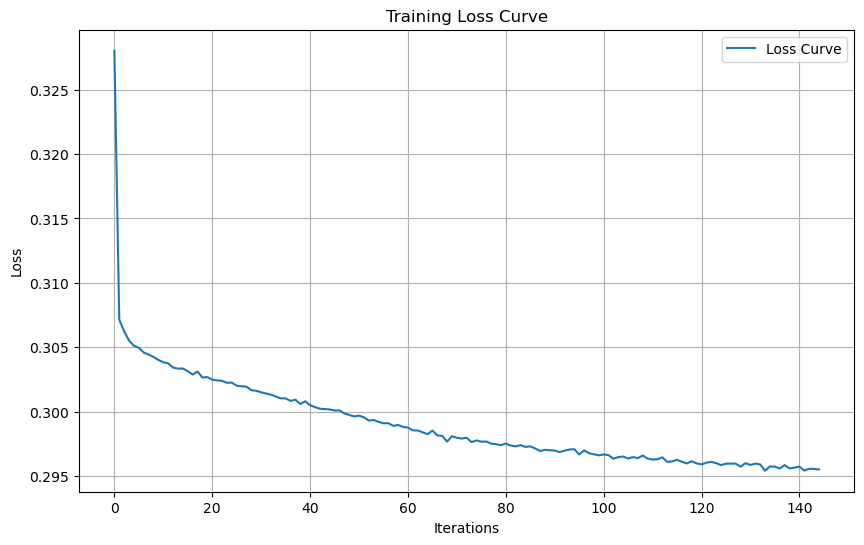

In [51]:
# Visualizar la curva de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Loss Curve')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

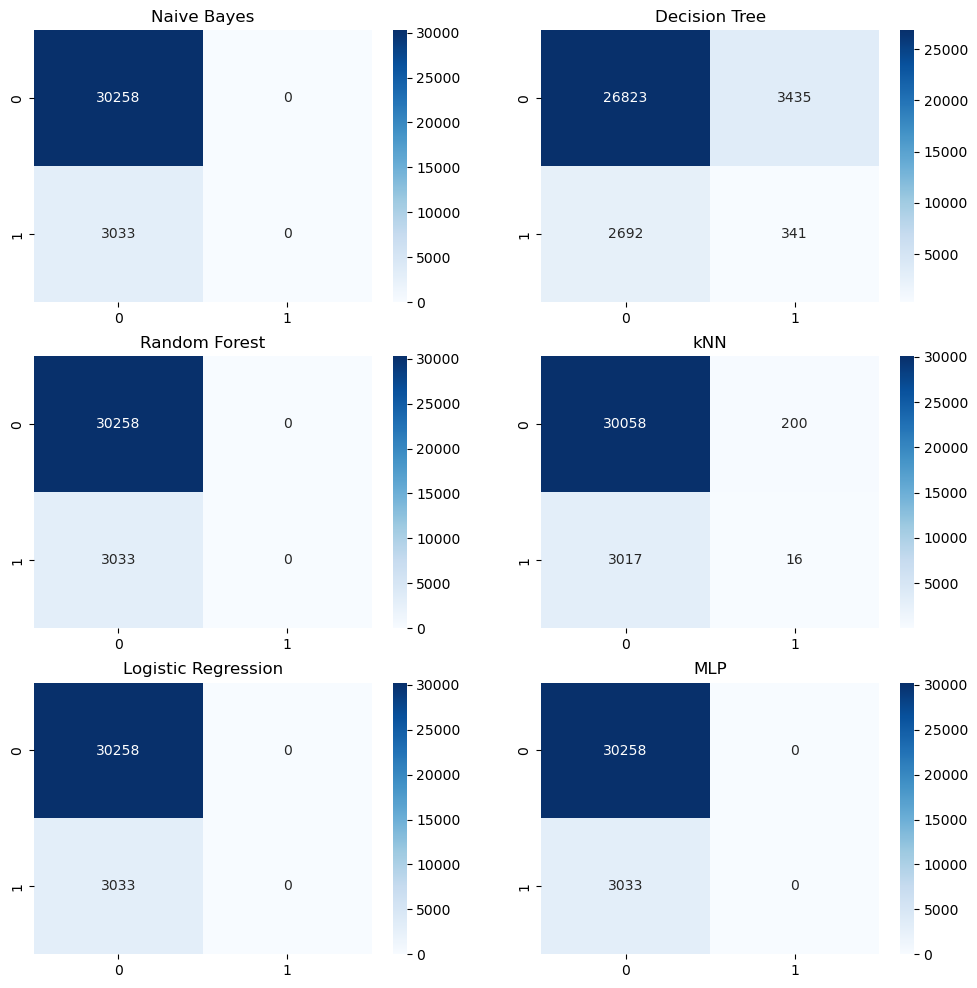

In [52]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
sns.heatmap(nv_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[0,0])
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[0,1])
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[1,0])
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[1,1])
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[2,0])
sns.heatmap(mlp_cm, annot=True, cmap='Blues', fmt='.0f', ax=ax[2,1])
ax[0,0].set_title('Naive Bayes')
ax[0,1].set_title('Decision Tree')
ax[1,0].set_title('Random Forest')
ax[1,1].set_title('kNN')
ax[2,0].set_title('Logistic Regression')
ax[2,1].set_title('MLP');

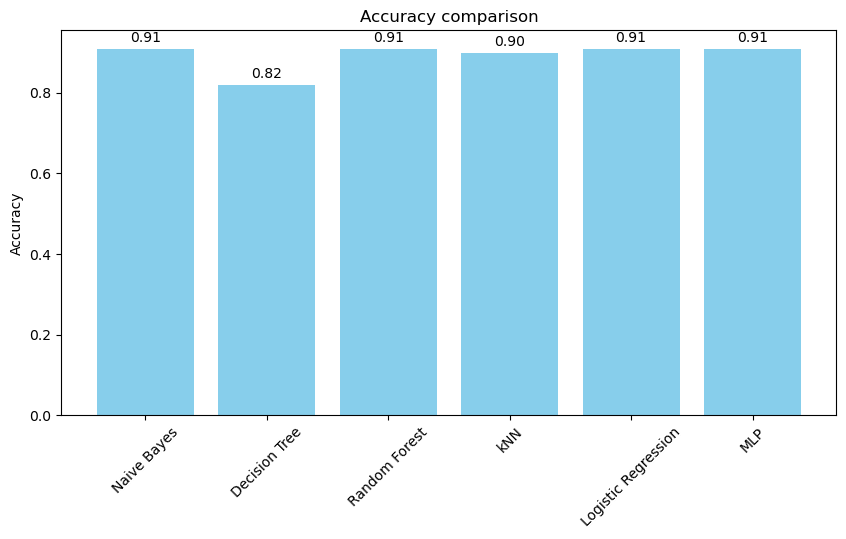

In [53]:
models_accuracy = [round(accuracy_score(y_test,y_pred),2),round(accuracy_score(y_test,y_pred2),2),round(accuracy_score(y_test,y_pred3),2),
                   round(accuracy_score(y_test,y_pred4),2),round(accuracy_score(y_test,y_pred5),2),round(accuracy_score(y_test,y_pred6),2)]
labels_models = ["Naive Bayes","Decision Tree","Random Forest","kNN","Logistic Regression","MLP"]

plt.subplots(figsize=(10,5))
plt.title("Accuracy comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
bars = plt.bar(labels_models, models_accuracy, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom');